In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("data.csv")
df = df.drop(columns="Unnamed: 0")

In [14]:
d = {0 : 1, 1 : 0}

In [15]:
df["Study.Group"].map(d)

0      1
1      1
2      1
3      1
4      1
      ..
282    0
283    0
284    0
285    0
286    0
Name: Study.Group, Length: 287, dtype: int64

In [16]:
df["Study.Group"]

0      0
1      0
2      0
3      0
4      0
      ..
282    1
283    1
284    1
285    1
286    1
Name: Study.Group, Length: 287, dtype: int64

In [8]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [9]:
X = df.drop(columns="Study.Group")
y = df["Study.Group"]

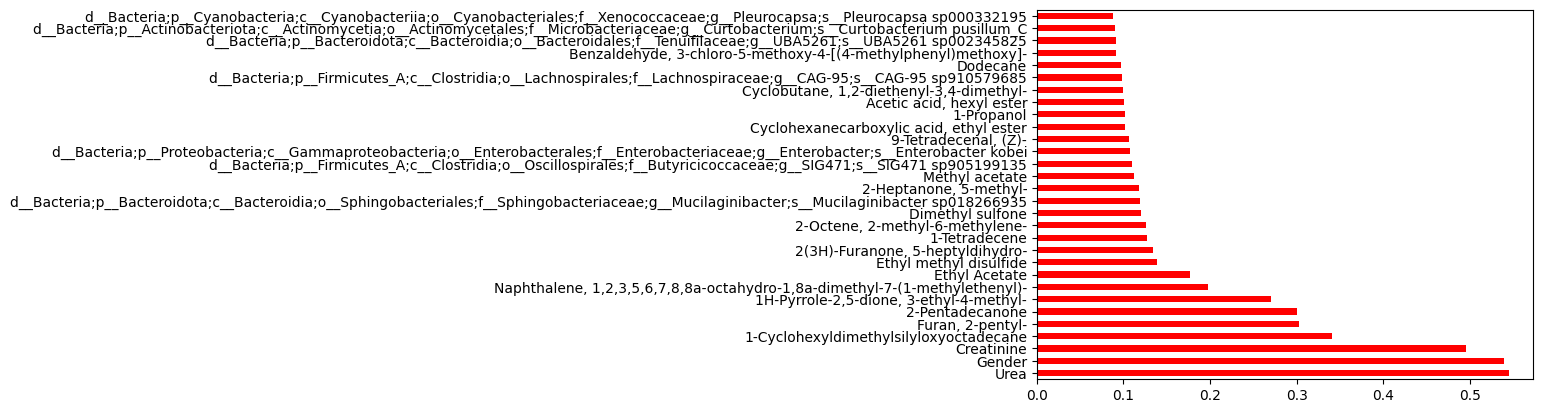

Urea                                                                                                                                           0.545158
Gender                                                                                                                                         0.538822
Creatinine                                                                                                                                     0.495074
1-Cyclohexyldimethylsilyloxyoctadecane                                                                                                         0.340401
Furan, 2-pentyl-                                                                                                                               0.302004
2-Pentadecanone                                                                                                                                0.300323
1H-Pyrrole-2,5-dione, 3-ethyl-4-methyl-                                                 

In [17]:
imps = mutual_info_classif(X, y)
feat_imps = pd.Series(imps, df.columns[0:len(df.columns) - 1])
top_feat_imps = feat_imps.nlargest(30)
top_feat_imps.plot(kind='barh', color='red')
plt.show()
print(top_feat_imps)

In [17]:
metabolite_genus_columns = ['1-Cyclohexyldimethylsilyloxyoctadecane', 'Methyl isobutyrate', '2-Pentadecanone', 'Furan, 2-pentyl-', '1H-Pyrrole-2,5-dione, 3-ethyl-4-methyl-', 'Naphthalene, 1,2,3,5,6,7,8,8a-octahydro-1,8a-dimethyl-7-(1-methylethenyl)-', 'Ethyl Acetate', 'Ethyl methyl disulfide', '2(3H)-Furanone, 5-heptyldihydro-', '1-Tetradecene', '2-Octene, 2-methyl-6-methylene-', '2-Heptanone, 5-methyl-']

In [26]:
from sklearn.feature_selection import chi2

In [28]:
chi2_stats, p_values = chi2(X, y)

In [71]:
arr = [float(f"{x:.4f}") for x in p_values]

In [ ]:
arr.sort(reverse=True)

0.0

In [41]:
chi_df = pd.DataFrame({"Feature": X.columns, "Chi2_Stat": chi2_stats, "P_Value" : p_values})

In [59]:
chi_df.sort_values(by="Chi2_Stat", ascending=False)


,Feature,Chi2_Stat,P_Value
281,Methyl tetradecanoate,359.272386,0.09
280,1-Decanol,190.265985,0.88
279,"Cyclohexanone, 2,2,6-trimethyl-",157.334481,0.96
278,251_unknown,150.169084,0.95
277,Isobutyl isovalerate,115.858508,0.03
...,...,...,...
4,Urea,0.000121,0.00
3,Creatinine,0.000087,0.00
2,BMI,0.000061,0.67
1,Gender,0.000039,0.17


In [63]:
chi_df["P_Value"] = chi_df["P_Value"].apply(lambda x: round(x, 4))

In [64]:
chi_df = chi_df.sort_values(by="P_Value", ascending=True)

In [82]:
chi_df.to_csv("chi_results.csv")

In [83]:
chi_df.head()

,Feature,Chi2_Stat,P_Value
29,Methyl butyrate,0.004687,0.0
267,(-)-Borneol,29.534616,0.0
13,Indole,0.001976,0.0
12,Toluene,0.001835,0.0
66,Heptanoic acid,0.038648,0.0


In [101]:
properties = {"border": "2px solid gray", "color": "green", "font-size": "16px"}


In [102]:
significant_chi_features = chi_df[chi_df["P_Value"] <= 0.05].iloc[:20, :]
significant_chi_features.style.set_properties(**properties)

,Feature,Chi2_Stat,P_Value
29,Methyl butyrate,0.004687,0.000000
267,(-)-Borneol,29.534616,0.000000
13,Indole,0.001976,0.000000
12,Toluene,0.001835,0.000000
66,Heptanoic acid,0.038648,0.000000
10,Phenol,0.001215,0.000000
52,(-)-Menthone,0.024416,0.000000
108,Carbon disulfide,0.187108,0.000000
47,Methyl propionate,0.020936,0.000000
111,"Butanoic acid, propyl ester",0.205957,0.000000
